Joi Chu-Ketterer 

DSC530 - Data Exploration and Analysis

Assignment 10.4: Final Project

August 6, 2019

In [1]:
import pandas as pd
import thinkstats2
from thinkstats2 import thinkplot
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf

In [2]:
student = pd.read_csv("students.csv")
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


For this assignment, I will be using the "Student Alcohol Consumption" dataset available from Kaggle (https://www.kaggle.com/uciml/student-alcohol-consumption), and will focus on the following variables:

    - Medu: is the highest level of education the student's mother has achieved (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    - Fedu: is the highest level of education the student's father has achieved (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    - Pstatus: is the parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
    - studytime: is the amount of time the student spends on studying per week (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    - romantic: is the relationship status of the student (binary: yes or no)
    - Dalc: is the student's workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    - G3: is the student's final grade for the math class
    
I hope to gain insight into the factors that lead to a student's success or failure in the course. I predict that a lot of these variables impact each other and their combined effects impacts the student's final grade, but if I were to guess the biggest contributor, I would predict it would either be their romantic status or their workday alcohol consumption. Specifically, that each of these variables would decrease the student's performance in class. 

To begin, I will plot histograms for all of the variables I will analyze.

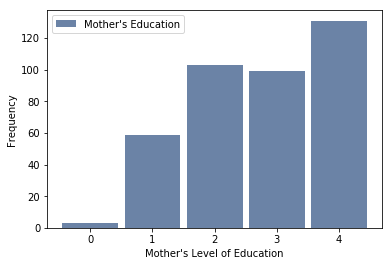

<Figure size 576x432 with 0 Axes>

In [3]:
hist_medu = thinkstats2.Hist(student.Medu, label = "Mother's Education")
thinkplot.Hist(hist_medu)
thinkplot.Show(xlabel = "Mother's Level of Education", ylabel = 'Frequency')

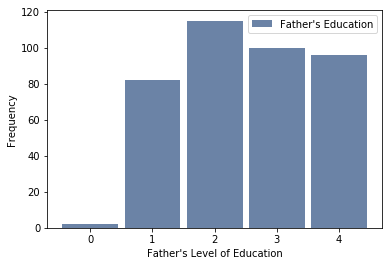

<Figure size 576x432 with 0 Axes>

In [161]:
hist_fedu = thinkstats2.Hist(student.Fedu, label = "Father's Education")
thinkplot.Hist(hist_fedu)
thinkplot.Show(xlabel = "Father's Level of Education", ylabel = 'Frequency')

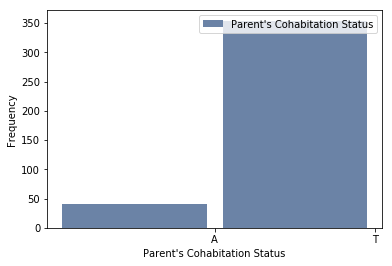

<Figure size 576x432 with 0 Axes>

In [162]:
hist_pstat = thinkstats2.Hist(student.Pstatus, label = "Parent's Cohabitation Status")
thinkplot.Hist(hist_pstat)
thinkplot.Show(xlabel = "Parent's Cohabitation Status" , ylabel = 'Frequency')


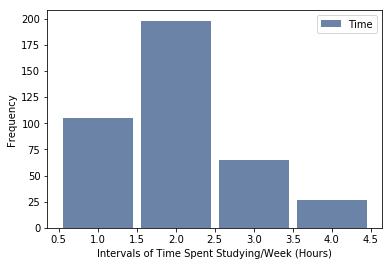

<Figure size 576x432 with 0 Axes>

In [4]:
hist_st = thinkstats2.Hist(student.studytime, label = "Time")
thinkplot.Hist(hist_st)
thinkplot.Show(xlabel = 'Intervals of Time Spent Studying/Week (Hours)', ylabel = 'Frequency')

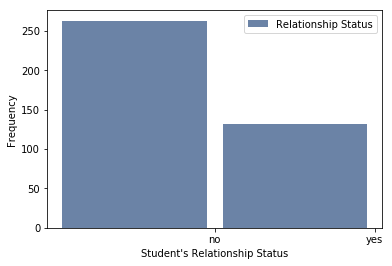

<Figure size 576x432 with 0 Axes>

In [164]:
hist_rom = thinkstats2.Hist(student.romantic, label = "Relationship Status")
thinkplot.Hist(hist_rom)
thinkplot.Show(xlabel = "Student's Relationship Status", ylabel = 'Frequency')

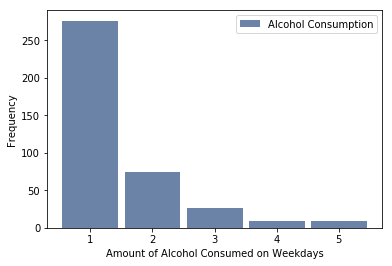

<Figure size 576x432 with 0 Axes>

In [165]:
hist_dalc = thinkstats2.Hist(student.Dalc, label = "Alcohol Consumption")
thinkplot.Hist(hist_dalc)
thinkplot.Show(xlabel = 'Amount of Alcohol Consumed on Weekdays', ylabel = 'Frequency')

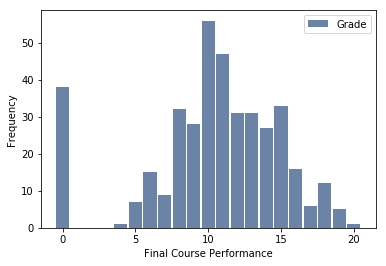

<Figure size 576x432 with 0 Axes>

In [167]:
hist_grade = thinkstats2.Hist(student.G3, label = "Grade")
thinkplot.Hist(hist_grade)
thinkplot.Show(xlabel = 'Final Course Performance', ylabel = 'Frequency')

Now that we have the histograms for each variable, we can identify outliers. Since we know what data is logical for each variable, we can see if there is any data that falls outside of those parameters that aren't being shown in our graphs. 

In [330]:
print('medu')
for edu, freq in hist_medu.Smallest(10):
    print(edu, freq)

print('\n fedu')
for edu, freq in hist_fedu.Smallest(5):
    print(edu, freq)

print('\n pstat')
for rel, freq in hist_pstat.Smallest(5):
    print(rel, freq)

print('\n st')
for time, freq in hist_st.Smallest(5):
    print(time, freq)
    
print('\n rom')
for rel, freq in hist_rom.Smallest(5):
    print(rel, freq)
    
print('\n dalc')
for amt, freq in hist_dalc.Smallest(5):
    print(amt, freq)
    
print('\n walc')
for amt, freq in hist_walc.Smallest(5):
    print(amt, freq)
    
print('\n grade')
for score, freq in hist_grade.Smallest(5):
    print(score, freq)

medu
0 3
1 59
2 103
3 99
4 131

 fedu
0 2
1 82
2 115
3 100
4 96

 pstat
A 41
T 354

 st
1 105
2 198
3 65
4 27

 rom
no 263
yes 132

 dalc
1 276
2 75
3 26
4 9
5 9

 walc
1 151
2 85
3 80
4 51
5 28

 grade
0 38
4 1
5 7
6 15
7 9


None of the values look out of place, and so it's save to say there are no outliers in this dataset. Surprising, but convenient. If there were data that were out of the score rank of any of the variables, since we know there is a defined threshold, the best course of action for this data set would be to remove them. Some other statistics I can look into include the mean (central tendancy), variance (spread), and standard deviation. For this part of the analysis, I will ignore the binary variables. 

In [333]:
st_mean = student.studytime.mean()
st_var = student.studytime.var()
st_std = student.studytime.std()

dalc_mean = student.Dalc.mean()
dalc_var = student.Dalc.var()
dalc_std = student.Dalc.std()

walc_mean = student.Walc.mean()
walc_var = student.Walc.var()
walc_std = student.Walc.std()

grade_mean = student.G3.mean()
grade_var = student.G3.var()
grade_std = student.G3.std()

print('variable:','mean', 'variance', 'standard deviation')
print('study time:', st_mean, st_var, st_std)
print('week drinking:', dalc_mean, dalc_var, dalc_std)
print('weekend drinking:', walc_mean, walc_var, walc_std)
print('final grade:', grade_mean, grade_var, grade_std)

variable: mean variance standard deviation
study time: 2.0354430379746837 0.704324359056738 0.839240346418556
week drinking: 1.481012658227848 0.7934202917175335 0.8907414280909659
weekend drinking: 2.2911392405063293 1.6586776328471353 1.2878965924510926
final grade: 10.415189873417722 20.989616397866737 4.5814426109978434


Another way to look at the distribution of our variables, other than the histogram, is by using probability mass functions (PMF). I will explore the effects of alcohol consumption on a student's grades. Specifically, I will compare the effects of a student having consumed very little alcohol during the week, compared to a student having moderate to very high amounts of alcohol. 

In [170]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

In [171]:
low = student[student.Dalc == 1]
other = student[student.Dalc != 1]

low_pmf = thinkstats2.Pmf((low.G3), label='low')
other_pmf = thinkstats2.Pmf((other.G3), label='others')

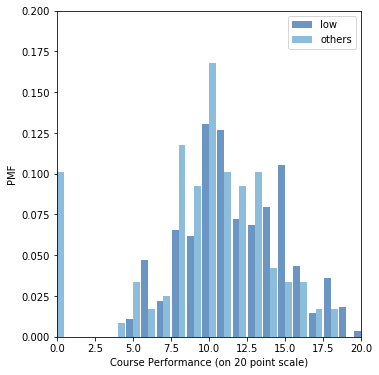

In [172]:
width=0.45
axis = [0, 20, 0, .2]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(low_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Course Performance (on 20 point scale)', ylabel='PMF', axis=axis)


Looking at the two PMFs, ignoring the students who failed the course, we can see that students who consume less alcohol during the week are more likely to achieve higher course performance over those to imbibe more. Now that we have explored alcohol consumption, let's explore the impact of a student's study time. I will compare the impact between students who study less than two hours a week compared to those who study two or more (upwards of ten or more hours). 

In [173]:
low_st = student[student.studytime == 1]
other_st = student[student.studytime != 1]

low_st_cdf = thinkstats2.Cdf((low_st.G3), label='low')
other_st_cdf = thinkstats2.Cdf((other_st.G3), label='others')

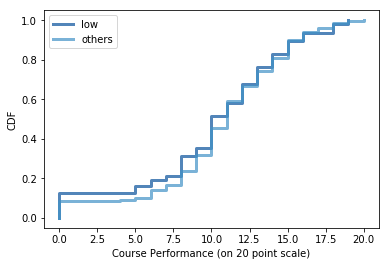

In [174]:
thinkplot.PrePlot(2)
thinkplot.cdfs([low_st_cdf, other_st_cdf])
thinkplot.Config(xlabel='Course Performance (on 20 point scale)', ylabel='CDF')

The CDFs make logical sense to me, where we are seeing that for the most part, students who study more than two hours per week achieve higher course performace. At this point, we know that both alcohol consumption and study time do have an impact on a student's performance in school. 

So far we have used empirical distributions to assess our data, so moving forward we can choose an analytical distribution. A few we can choose from include:
    - Exponential Distribution
    - Normal Distribution
    - Lognormal Distribution
    - Pareto Distribution 
    
For this exercise, I will graph the distribution of a student's course performance. Given the nature and distribution of this variable, I predict a normal distribution is better suited for this data. I will start to estimating the parameters of a normal distribution. 

In [211]:
def MakeNormModel(data):
    
    cdf = thinkstats2.Cdf(data, label = "Course Performance")

    mean, var = thinkstats2.TrimmedMeanVar(data)
    std = np.sqrt(var)

    xmin = mean - 5 * std
    xmax = mean + 5 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)

    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

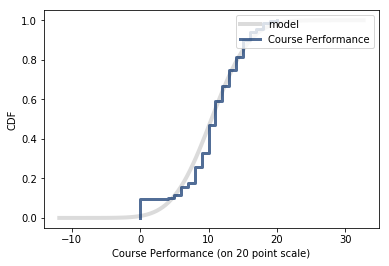

In [239]:
MakeNormModel(student.G3)
thinkplot.Config(xlabel='Course Performance (on 20 point scale)',
                 ylabel='CDF', loc='upper right')

We can see here, that the normal distribution isn't the best model for the data. It's certainly better than a Pareto distribution would be though, which I can demonstrate. Parteo distributions are best for modeling things that are not evenly distributed (like the allocation of wealth).

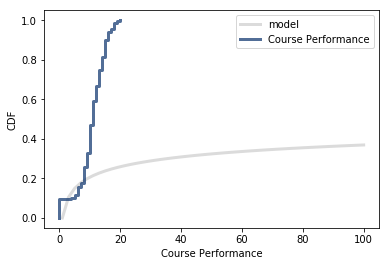

In [234]:
cdf = thinkstats2.Cdf(student.G3, label='Course Performance')

xs, ys = thinkstats2.RenderParetoCdf(xmin=1, alpha=0.1, low=0, high=100)
thinkplot.Plot(xs, ys, label='model', color='0.8')

thinkplot.Cdf(cdf) 
thinkplot.Config(xlabel='Course Performance',
                 ylabel='CDF',
                 loc='upper right')

To explore the impact of a student's mother and fathers' education, I will initially use scatterplots. 

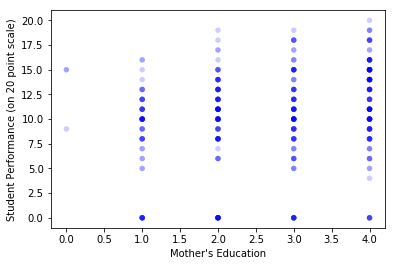

In [249]:
thinkplot.Scatter(student.Medu, student.G3)
thinkplot.Config(xlabel="Mother's Education",
                 ylabel='Student Performance (on 20 point scale)',
                 legend=False)

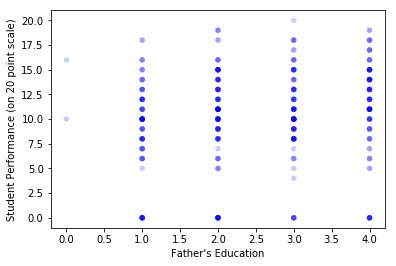

In [250]:
thinkplot.Scatter(student.Fedu, student.G3)
thinkplot.Config(xlabel="Father's Education",
                 ylabel='Student Performance (on 20 point scale)',
                 legend=False)

Since both mother's education and father's education have distinct values, we don't see a morphed set of data points, which we are used to seeing in scatterplots. Regardless, we can still get a sense of the relationship between a parent's education and how well their student performs in school. 

We can recognize that the higher the Mother's education, the more likely the student will achieve higher performance in school, whereas the Father's education doesn't seem to matter as much. To see these effects in numerical terms, we can calculate the correlation between the various variables. 

Covariance is not a very useful statistic here since it really just tells us how much the two variables vary together. While theoretically useful, the statistic itself is difficult to interpret. Correlation, on the otherhand, standardizes both variables so to calculate standard scores. For this reason, it is always between -1 and +1, making it much easier to comprehend. 

The two most common correlations are Pearson and Spearman. Pearson's correlation is good to use when the two variables are linear and roughly normally distributed. From the above scatterplots and the initial histograms I created, it is clear that parent's education and student's performance are not linearly related. In this case, the Spearman correlation would be better suited for the data, as it mitigates the effect of outliers and skewed distributions. 

When used on non-linear data, the Pearson's correlation can often downplay the relationship between two variables. To showcase this, I will calculate both the Pearson and Spearman correlations. 

In [256]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

print("Mother's education Pearson correlation, Father's education Pearson correlation")
Corr(student.Medu, student.G3), Corr(student.Fedu, student.G3)  

Mother's education Pearson correlation, Father's education Pearson correlation


(0.21714749613860593, 0.15245693890425865)

In [257]:
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

print("Mother's education Spearman correlation, Father's education Spearman correlation")
SpearmanCorr(student.Medu, student.G3), SpearmanCorr(student.Fedu, student.G3)

Mother's education Spearman correlation, Father's education Spearman correlation


(0.2250358528745645, 0.17004900082627797)

Here, we see an increase from Pearson correlation to Spearman correlation for Mother's education of roughly 0.007, and for Father's education an increase of roughly 0.018. In both cases, we see that the Spearman correlation is in fact more accurate than the Pearson, but with such low correlation values it also confirms that the level of education a student's parents achieved has very little impact on their school performance. 

Since we haven't explored the impacts of the parent's cohabitation status and a student's relationship status yet, I will go ahead and calculate the Spearman's correlation for those variables. Additionally, earlier I saw a positive relationship between student's performance and study time and a negative relationship with alcohol consumption, so I will confirm that by calculating their correlations as well. 

In [294]:
print("Spearman correlation for student performance and study time:", SpearmanCorr(student.studytime, student.G3))
print("Spearman correlation for student performance and alcohol consumption", SpearmanCorr(student.Dalc, student.G3))


Spearman correlation for student performance and study time: 0.10516968678133246
Spearman correlation for student performance and alcohol consumption -0.12094448004589972


At this time, despite the odds, it seems that a mother's education has the greatest impact on a student's performance. Followed by their father's education, and then their alcohol consumption. While we have some data to support this, we can do into more depth and test the hypothesis. 

I, personally, seem dubious that a parent's education level would have a bigger impact on a student's school performance over the amount of time they allocate to studying, so I will conduct a hypothesis test that specifically looks at testing a correlation. This will help us determine if the correlation calculated was an effect due to chance. 

In this case, the null hypothesis is that there is no correlation between a mother's education (or father's) and how their child performs in school. 

In [275]:
pval_medu = stats.spearmanr(student.Medu, student.G3)
pval_fedu = stats.spearmanr(student.Fedu, student.G3)
pval_medu, pval_fedu

(SpearmanrResult(correlation=0.2250358528745645, pvalue=6.290448010609436e-06),
 SpearmanrResult(correlation=0.17004900082627797, pvalue=0.0006895636032614371))

Here, we see that the p-value for both the correlation between a child's school performance and their parent's education is less thatn 0.05, indicating significance. In this case, we can reject the null hypothesis, and that the variables are not correlated by chance. 

To further explore the relationship between a student's relationship status, I will run a chi-square test. I'm choosing this since the romantic variable is categorical. While a student's performance is not, I can simulate it to be, where students who perform below 80% scored 'poorly', and those who performed after 80% scored 'well'. 

Here, our null hypothesis will be that a student's performance and their relationship status are unrelated. 

In [8]:
perf_good = student.G3 >= (20*.8)
perf_bad = student.G3 < (20*0.8)

student_perf = np.array(perf_good, perf_bad)

def RunChiStat(array_1, array_2):
    table = pd.crosstab(array_1, array_2)
    chi2_cont, p_val, dof, expected = chi2_contingency(table.values)
    return(p_val)
    
print('p-value for student performance and romantic relationship status:', RunChiStat(student_perf, student.romantic))
print('p-value for student performance and parential cohabitation status:', RunChiStat(student_perf, student.Pstatus))

p-value for student performance and romantic relationship status: (1.8695690479001439, 0.17152444514500897)
p-value for student performance and parential cohabitation status: (0.5434515812319138, 0.46100578894961775)


We see that neither p-value for the chi statistic is less than 0.05, which means we have to accept our null hypothesis. This means that the relationship status of a student and the cohabitation status of their parents is not related to a student's performance in school. 


Now that we have a better sense of how all of these variables relate to each other, we can run a regression and see if we can derive a formula that will allow us to describe a student's performance. The three variables I will focus on are the mother's education level, time the student spends studying, and a student's alcohol intake during the week since these seem to be the most impactful variables. 

First, let's run a few calculations to determine if these are the variables I should use in my multiple regression.

In [348]:
diff_grade = low_st.G3.mean() - other_st.G3.mean()
diff_drink = low_st.Dalc.mean() - other_st.Dalc.mean()

results = smf.ols('G3 ~ Dalc', data = student).fit()
slope = results.params['Dalc']
expected_diff = slope * diff_drink

print(slope, expected_diff)

-0.28113864593456256 -0.10756207635920041


We see that the expected difference is about half of the original slope, which indicates that the observed difference in a student's performance in school, given they don't study often, can partly be explained by a difference in their alcohol consumption.

In [349]:
diff_grade = low_st.G3.mean() - other_st.G3.mean()
diff_medu = low_st.Medu.mean() - other_st.Medu.mean()
diff_fedu = low_st.Fedu.mean() - other_st.Fedu.mean()

results_medu = smf.ols('G3 ~ Medu', data = student).fit()
slope_medu = results_medu.params['Medu']
expected_diff_medu = slope_medu * diff_medu

results_fedu = smf.ols('G3 ~ Fedu', data = student).fit()
slope_fedu = results_fedu.params['Fedu']
expected_diff_fedu = slope_fedu * diff_fedu

print("Impact of mother's education:", slope_medu, expected_diff_medu)
print("Impact of fathers's education:", slope_fedu, expected_diff_fedu)

Impact of mother's education: 0.9087575195427711 -0.11415426969625943
Impact of fathers's education: 0.6418602884521498 -0.07293387842510471


Now, we can use multiple regression to further explore these relationships.

In [350]:
student['mom_smart'] = student.Medu == 4
formula_medu_smart = 'G3 ~ mom_smart'
results_medu = smf.ols(formula_medu_smart, data = student).fit()
results_medu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     17.69
Date:                Sat, 03 Aug 2019   Prob (F-statistic):           3.22e-05
Time:                        10:59:17   Log-Likelihood:                -1152.5
No. Observations:                 395   AIC:                             2309.
Df Residuals:                     393   BIC:                             2317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.7462      0.276     35.289      0.000       9.203      10.289
mom_smart[T.True]     2.0171      0.480      4.206      0.000       1.074       2.960
==============================================================================
Omnibus:                       32.933   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.730
Skew:                          -0.743   Prob(JB):                     3.89e-09
Kurtosis:                       3.383   Cond. No.                         2.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [355]:
student['low_drink'] = student.Dalc == 1
formula_alc = 'G3 ~ low_drink'
results_alc = smf.ols(formula_alc, data = student).fit()
results_alc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.416
Date:                Sat, 03 Aug 2019   Prob (F-statistic):             0.0362
Time:                        11:06:27   Log-Likelihood:                -1159.0
No. Observations:                 395   AIC:                             2322.
Df Residuals:                     393   BIC:                             2330.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.6807      0.418     23.150      0.000       8.859      10.503
low_drink[T.True]     1.0512      0.500      2.101      0.036       0.068       2.035
==============================================================================
Omnibus:                       35.048   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.767
Skew:                          -0.767   Prob(JB):                     8.52e-10
Kurtosis:                       3.432   Cond. No.                         3.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What we're paying attention to initially here is the mom_smart and low_drink variable, which is a Boolean, set to True. When the mother has a higher level of education, the mom_smart[T.True] variable has a coefficient of 2.017, which indicates that it accounts for a difference of 2.017 points in their child's school performance. 

the low_drink[T.True] variable on the other hand has a coefficient of 1.051, incidating that a student's low alcohol intake during the week only accounts for a 1.051 point difference in their school performance. 

In [356]:
formula_medu_alc = 'G3 ~ mom_smart + low_drink'
results_medu_alc = smf.ols(formula_medu_alc, data = student).fit()
results_medu_alc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     11.29
Date:                Sat, 03 Aug 2019   Prob (F-statistic):           1.71e-05
Time:                        11:06:37   Log-Likelihood:                -1150.1
No. Observations:                 395   AIC:                             2306.
Df Residuals:                     392   BIC:                             2318.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             9.0005      0.440     20.468      0.000       8.136       9.865
mom_smart[T.True]     2.0236      0.477      4.240      0.000       1.085       2.962
low_drink[T.True]     1.0642      0.490      2.173      0.030       0.101       2.027
==============================================================================
Omnibus:                       34.873   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.513
Skew:                          -0.765   Prob(JB):                     9.67e-10
Kurtosis:                       3.423   Cond. No.                         3.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

When we create a model that incorporates the two variables together, we see an increase in both their coefficients, indicating that the two have a somewhat additive impact on a student's school performance. Additionally, if we compare the R^2 values, we see they were initially 0.043 for mother's education and 0.011 for low alcohol intake. The R^2 value for the combined model increased to 0.054, which also supports that the combined model is a better predictor of a student's performance. But keep in mind, it seems a student's alcohol intake doesn't have as big of an impact. 

In conclusion, despite there being several factors impacting a student's performance in school, the level of education their mother achieved has the largest impact of the following variables we tested:
 - Mother's education
 - Father's education
 - Parent's cohabitation status
 - Amount of time spent studying
 - Student's relationship status
 - Student's alcohol intake on weekdays
 
 Not what I expected, but interesting to know!